# **Selección de DataSet**

**Descripción del Dataset:** Este dataset con un tamaño de 10.000 filas y 14 columnas contiene información sobre clientes de una entidad financiera.

**Objetivo:** El problema de clasificación a resolver es predecir la variable "Exited" (1: el cliente se dió de baja, 0: el cliente permaneció). Esto permite a la empresa tomar decisiones basadas en el riesgo de pérdida de clientes.

**Variables:**

*   RowNumber: Índice de cada fila (irrelevante para el análisis).
*   CustomerId: Identificación única del cliente (también irrelevante para el análisis).
*   Surname: Apellido del cliente (irrelevante como predictor).
*   CreditScore: Puntaje de crédito del cliente (numérica).
*   Geography: País o región donde reside el cliente (categórica).
*   Gender: Género del cliente (categórica: "Male" o "Female").
*   Age: Edad del cliente (numérica).
*   Tenure: Tiempo de permanencia del cliente con la entidad, en años (numérica).
*   Balance: Saldo actual en la cuenta bancaria del cliente (numérica).
*   NumOfProducts: Número de productos contratados por el cliente (numérica).
*   HasCrCard: Indica si el cliente posee tarjeta de crédito (binaria: 1 o 0).
*   IsActiveMember: Indica si el cliente es un miembro activo (binaria: 1 o 0).
*   EstimatedSalary: Salario estimado del cliente (numérica).
*   Exited: Variable objetivo que indica si el cliente abandonó el servicio (binaria: 1 o 0).


#**0. Preparacion del Entorno**

**Descarga del dataset**

In [1]:
import pandas as pd

def load_data():
    url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv"
    df = pd.read_csv(url)
    return df
df = load_data()

# **1. Analisis Exploratorio**

##**1.1. Mostramos en pantalla el dataframe (df)**

In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


* Loan_ID: Identificador único para cada solicitud de préstamo. (Variable irrelevante para el modelo)
* Gender: Género del solicitante.
* Married: Estado civil del solicitante.
* Dependents: Número de personas a cargo del solicitante.
* Education: Nivel educativo del solicitante.
* Self_Employed: Indica si el solicitante trabaja por cuenta propia.
* ApplicantIncome: Ingreso mensual del solicitante en unidades monetarias.
* CoapplicantIncome: Ingreso mensual de un co-solicitante (por ejemplo, cónyuge).
* LoanAmount: Monto solicitado del préstamo en miles de unidades monetarias.
* Loan_Amount_Term: Duración del préstamo en días
* Credit_History: Registro crediticio del solicitante. (1 indica buen historial, 0 indica mal historial).
* Property_Area: Ubicación de la propiedad relacionada con el préstamo.
* Loan_Status: Variable objetivo del modelo.

In [3]:
df = df.drop(columns= ['Loan_ID'])

In [4]:
# Convertimos 'Y' a 1 y 'N' a 0 en la variable objetivo Loan_Status
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

## **1.2. Valores nulos y Estadisticos descriptivos**

In [5]:
print("Tamaño df:\n", df.shape)

print("Columnas del df:\n", df.columns)

Tamaño df:
 (614, 12)
Columnas del df:
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


**Valores nulos**

In [6]:
# Mostramos por pantalla el tipo de dato por variable y cantidad de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


Podemos ver que hay nulos en la mayoría de variables

In [7]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Dado que el dataset tiene 614 filas, la cantidad de valores nulos en algunas columnas no es excesiva. Por tanto, la cantidad de NaNs no justifica tratar los nulos en función de la moda/mediana según su rango de ingresos. Por lo que rellenar con moda o mediana global es la mejor opción para mantener el balance de los datos.

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

C:\Users\Elias\AppData\Local\Temp\ipykernel_15172\948652407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\Elias\AppData\Local\Temp\ipykernel_15172\948652407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



**Estadisticos descriptivos**

In [9]:
# Mostramos en pantalla los estadisticos descriptivos de las variables numericas
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


Podemos hacer un analisis inicial sobre el conjunto con el que estamos trabajando:

* La media de ingresos del solicitante es 5403 y la del co-solicitante es 1621, lo que indica que en muchos casos el segundo ingreso es significativamente menor o incluso cero (percentil 25 de CoapplicantIncome es 0).
La desviación estándar es alta (6109 y 2926), lo que sugiere que los ingresos varían considerablemente entre los solicitantes.


* La media del préstamo es 146k, con una mediana de 128k, lo que indica una distribución sesgada hacia préstamos más grandes.
Hay una gran dispersión en los valores, con algunos préstamos alcanzando los 700k.

* La mediana de la duración del préstamo es 360 días, lo que sugiere que la mayoría de los préstamos se otorgan a largo plazo.

**Conclusiones iniciales:**

Hayn un riesgo de sesgo ya que, la gran variabilidad en los ingresos y cantidades de préstamos puede afectar la predicción del modelo si no se normalizan correctamente.

Luego, hay valores atípicos en los préstamos porque hay valores extremadamente grandes en comparación con la mediana, lo que podría afectar el desempeño del modelo.

In [10]:
# Mostramos en pantalla los estadisticos descriptivos de las variables categoricas
df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']].describe()

,Credit_History,Loan_Status
count,614.000000,614.000000
mean,0.855049,0.687296
std,0.352339,0.463973
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


El dataset tiene un sesgo hacia hombres, casados y graduados, lo que podría afectar el rendimiento del modelo si no se balancean los datos.

La tasa de aprobación es relativamente alta (68%), lo que podría significar que el modelo necesita más diferenciación entre aprobados y rechazados.

En conclusión, es posible que necesitemos aplicar técnicas de undersampling.

## **1.3. Analisis de Outliers**

**Histograma**


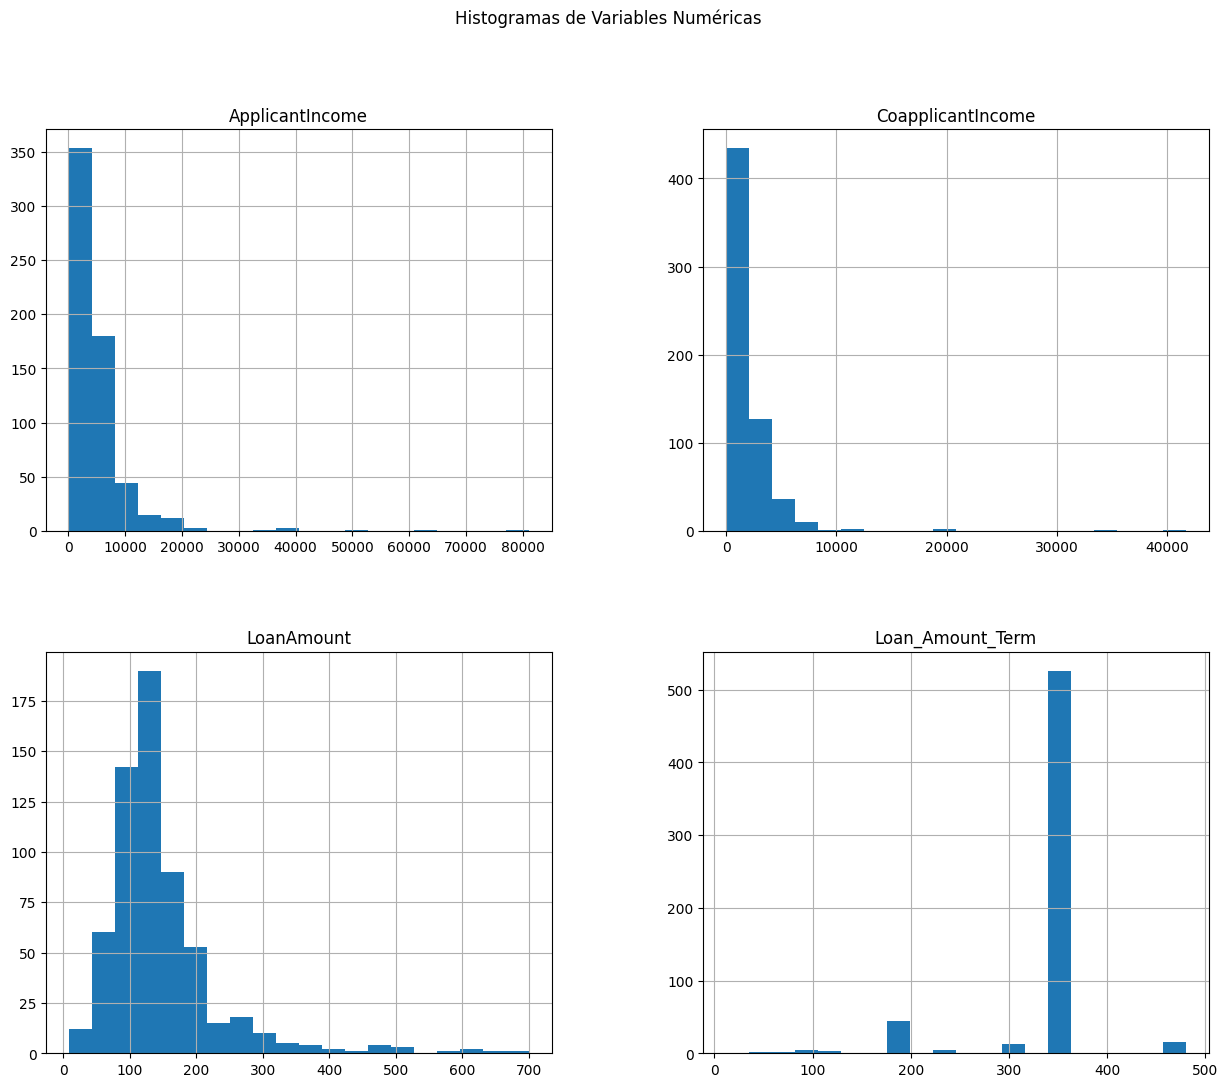

In [11]:
#Importamos librerias
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las columnas numéricas excluyendo las variables binarias
numerical_columns = [
    col for col in df.select_dtypes(include=['int64', 'float64'])
    if not (df[col].nunique() == 2 and sorted(df[col].unique()) == [0, 1])
]

# Graficamos histogramas de las variables
df[numerical_columns].hist(bins=20, figsize=(15, 12))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

Tanto ApplicantIncome como CoapplicantIncome tienen una distribución altamente sesgada hacia la derecha.
La mayoría de los ingresos son bajos, pero hay algunos valores extremadamente altos (outliers).

En cuanto al LoanAmount, la distribución es sesgada a la derecha, indicando que la mayoría de los préstamos son pequeños o medianos, pero hay algunos valores extremadamente altos (outliers).

Esto indica que hay pocos solicitantes con ingresos muy altos que piden préstamos elevados, para que no afecte a la capacidad de generalizar del modelo vamos a reemplazar los valores extremos por el percentil 95.
Loan_Amount_Term (Plazo del Préstamo)

Por último, en cuanto al plazo del préstamo hay una elevada concentración en 360 días. Este sesgo podría hacer que el modelo aprenda patrones incorrectos si la variable no tiene suficiente variabilidad.
Una posible solución sería agruparlos en rangos para mejorar la representación de los valores más bajos (<180 días, 180-360 días, >360 días).

In [12]:
import numpy as np
# Calculamos el percentil 95 para LoanAmount y ApplicantIncome
loan_amount_cap = df['LoanAmount'].quantile(0.90)
applicant_income_cap = df['ApplicantIncome'].quantile(0.90)
coapplicant_income_cap = df['CoapplicantIncome'].quantile(0.95)


# Reemplazamos los valores extremos
df['LoanAmount'] = np.where(df['LoanAmount'] > loan_amount_cap, loan_amount_cap, df['LoanAmount'])
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > applicant_income_cap, applicant_income_cap, df['ApplicantIncome'])
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > coapplicant_income_cap, coapplicant_income_cap, df['CoapplicantIncome'])

In [13]:
# Convertimos el plazo de préstamo a variable categórica
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(lambda x: 0 if x <= 180 else (1 if x <= 360 else 2))

**Graficos de barras (variables categoricas)**



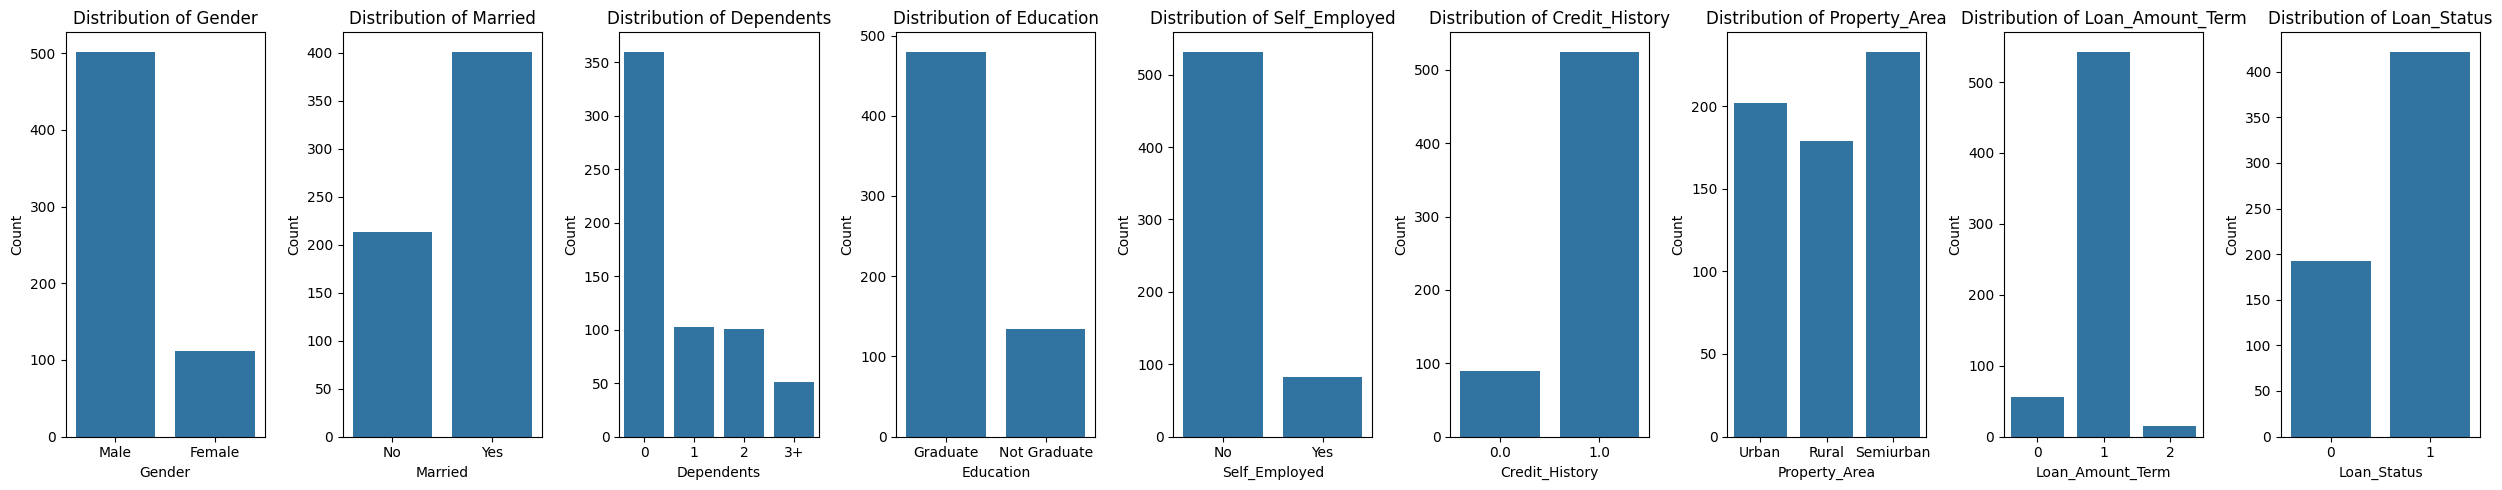

In [14]:
# Definimos las columnas categoricas
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Amount_Term', 'Loan_Status']

# Creamos un subplot con estas columnas
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(25, 5))

# Creamos un bucle con las columnas para asignarles ejes
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

* Género: La mayoría de los solicitantes son hombres, con una menor representación de mujeres (~112). Deberíamos evaluar si el género influye en la aprobación

* Estado civil: La mayoría de los solicitantes están casados. Puede estar relacionado con la percepción de estabilidad financiera.
Dependents (Número de Dependientes)

* Dependientes: Casi 360 personas no tienen personas a cargo. Un menor número de personas a cargo podría correlacionarse con una mayor capacidad de pago.

* Educación: Casi 480 personas tienen un título universitario, lo que puede estar relacionado con mejores ingresos y mayor tasa de aprobación de préstamos.

* Autónomos: La mayoría no son autónomos, lo que podría sugerir una mayor estabilidad financiera.

* Propiedad: Mayor concentración en zonas semiurbanas, seguidas de urbanas y rurales.



Estado préstamo: Alta tasa de aprobación. Si el dataset tiene más casos aprobados que rechazados, el modelo puede sesgarse hacia aprobar más préstamos.

**Conclusiones**

Por un lado, se observa un posible sesgo en género, estado civil y nivel educativo, lo que sugiere que la aprobación de préstamos puede estar influenciada por estos factores.

Por otro lado, la distribución de personas a cargo y trabajo autónomo sugiere que ciertos grupos pueden enfrentar más dificultades para obtener préstamos.

Podría ser útil analizar la correlación entre estas variables y la aprobación del préstamo, para determinar si el modelo debería balancear los datos o ajustar pesos.

**Boxplot**

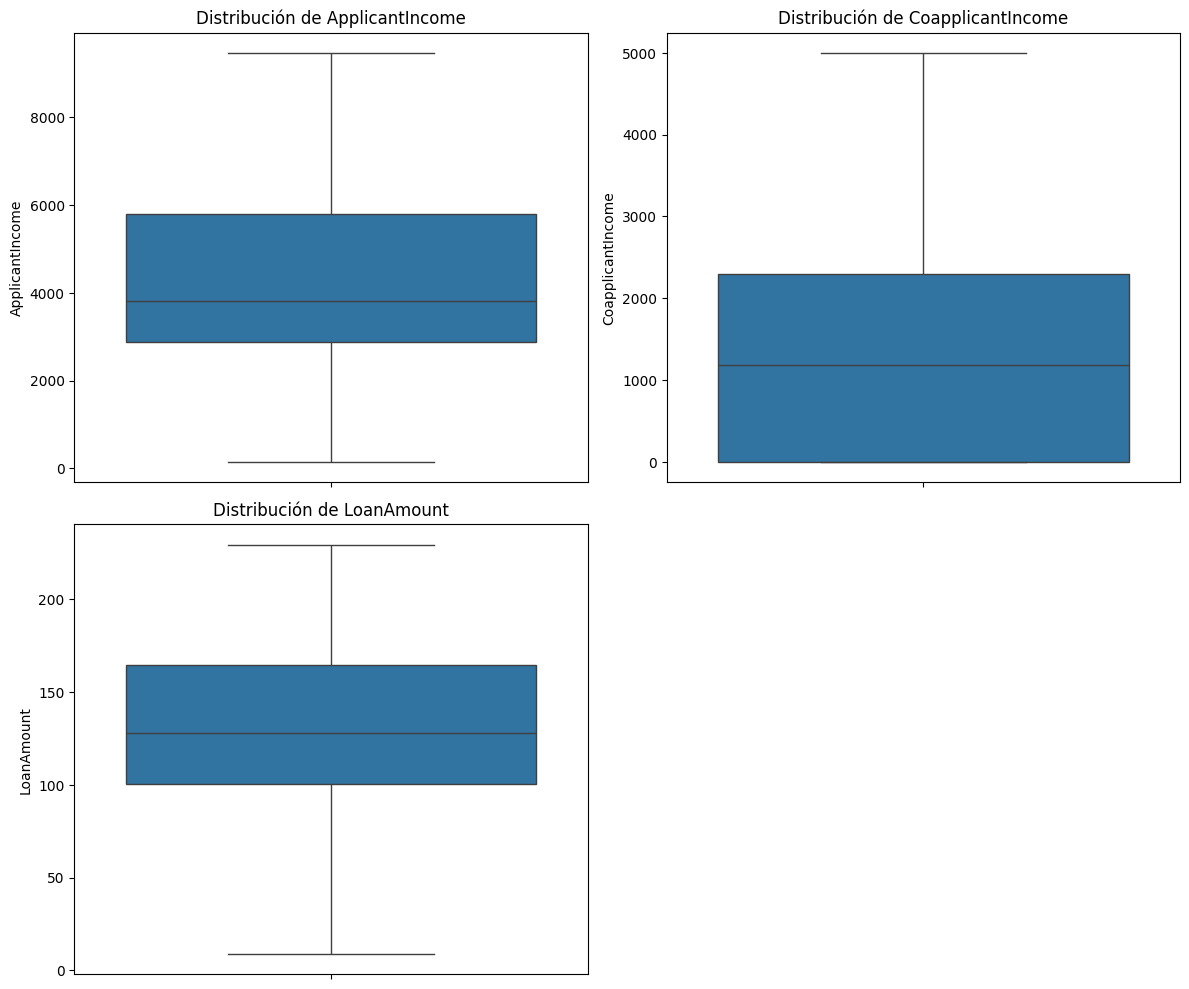

In [15]:
# Seleccionamos las columnas numéricas
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Calculamos el número de filas y columnas necesarias para los subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2  # Redondeamos hacia arriba para más de 2 columnas

# Crear subplots dinámicamente
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))  # 2 columnas por fila
axes = axes.flatten()  # Aplanamos para iterar fácilmente

# Dibujamos cada boxplot
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')

# Ajustamos diseño y eliminamos ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].remove()

plt.tight_layout()
plt.show()

## **1.4. Matriz de corelaciones**

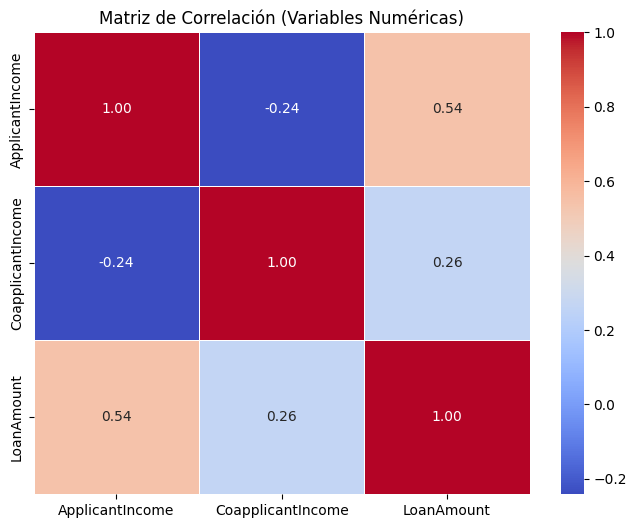

In [16]:
# Seleccionamos las columnas numéricas para la matriz de correlación
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
corr_matrix = df[num_columns].corr()

# Visualizamos la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (Variables Numéricas)')
plt.show()

# **2. Transformamos las variables**


In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Amount_Term']

# Transformamos las variables numéricas (imputación + escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Transformamos las variables categóricas nominales (One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop= 'first'))
])

# Combinamos transformadores en ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
model_1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(random_state=42))
                        ])
model_2 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', DecisionTreeClassifier(random_state=42))
                        ])
model_3 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', RandomForestClassifier(random_state=42))
                        ])
model_4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1, probability=True, random_state=42))
])

#**3. Modelo clasficación**



**Metodologia:**
Decidimos que testearemos multiples modelos de clasificacion para poder quedarnos con el mejor despues de evaluar las metricas de precision, accuracy y recall.

Dado el contexto económico actual, priorizamos la precisión en nuestro modelo de aprobación de préstamos para minimizar el riesgo de impago y garantizar la estabilidad financiera de la entidad.

Además, utilizaremos el metodo de undersampling de RandomUnderSampler para ver si podemos mejorar el rendimiento del modelo.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, classification_report

# Creamos diccionario de modelos
models = {
    "Logistic Regression": model_1,
    "Decision Tree": model_2,
    "Random Forest": model_3,
    "SVC": model_4,

}

# Entrenamos y predecimos en cada modelo
for name, model in models.items():
    print(f"\n modelo: {name}")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

# Evaluamos cada modelo
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")



 modelo: Logistic Regression
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1       0.83      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.87      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123


 modelo: Decision Tree
Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.71      0.64        38
           1       0.86      0.76      0.81        85

    accuracy                           0.75       123
   macro avg       0.71      0.74      0.72       123
weighted avg       0.77      0.75      0.75       123


 modelo: Random Forest
Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        38
           1       0.85      0.91      0.8

###**UnderSampling**

In [22]:
# Importamos la librería RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler

# Aplicamos undersampling sobre el conjunto de entrenamiento
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

#Verificamos que se ha hecho el undersampling correctamente
print("Distribución después de undersampling:")
print(pd.Series(y_train_resampled).value_counts())

Distribución después de undersampling:
Loan_Status
1    308
0    154
Name: count, dtype: int64


In [23]:
# Entrenamos y predecimos en cada modelo
for name, model in models.items():
    print(f"\nEntrenando modelo: {name}")

    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)

# Evaluamos cada modelo
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")


Entrenando modelo: Logistic Regression
Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1       0.83      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.87      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123


Entrenando modelo: Decision Tree
Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.63        38
           1       0.85      0.75      0.80        85

    accuracy                           0.74       123
   macro avg       0.71      0.73      0.71       123
weighted avg       0.76      0.74      0.75       123


Entrenando modelo: Random Forest
Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.63      0.68        38
           1

Dado que nuestro objetivo es minimizar impagos y reducir la concesión de préstamos a clientes de alto riesgo, el modelo de SVC es el que mejor rendimiento obtiene.

* Maximiza la precisión en clientes solventes, asegurando que las aprobaciones sean más seguras.
* Reduce la probabilidad de conceder préstamos a clientes que no pueden pagar (menor tasa de falsos positivos).
* Mantiene un recall alto, lo que significa que no estamos rechazando demasiados clientes solventes.

Por tanto, El modelo SVC es el más adecuado para una entidad financiera que prioriza precisión y busca una cartera de préstamos más segura y estable.

In [24]:
import joblib

# Guardamos el modelo en un archivo .pkl
joblib.dump(model_4, 'modelo_svc.pkl')

print("Modelo guardado correctamente como modelo_svc.pkl")


Modelo guardado correctamente como modelo_svc.pkl
